<a href="https://colab.research.google.com/github/Iveynganga/Movie-Recommender-System-Capstone-Project/blob/main/MovieRecommenderProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RECOMMENDER SYSTEM
With an ever-growing library of movies available on various platforms, users often struggle to find content that matches their tastes. This project addresses the challenge by creating a personalized movie recommendation system. The goal is to enhance user experience by suggesting movies that they are likely to find appealing based on their past viewing history and the preferences of similar users.

# Data Sourcing
**Loading of data and understanding the dataset**

The first step is loading the data and understanding the dataset which involves reviewing the dataset's columns, types, and summary statistics to gain insights into the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
credits_data = pd.read_csv('/content/tmdb_5000_credits.csv')
movies_data = pd.read_csv('/content/tmdb_5000_movies.csv')

<ipython-input-2-bad6b2529a58>:1: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264

In [3]:
credits_data.head()

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies = movies_data.merge(credits_data,on="title")

movies.shape

(4809, 1284)

In [6]:
import pandas as pd

# Load the movies and credits datasets
movies_data = pd.read_csv('/content/tmdb_5000_movies.csv')
credits_data = pd.read_csv('/content/tmdb_5000_credits.csv')

# Merge the datasets on 'movie_id' to add 'cast' and 'crew' to movies_data
movies_with_credits = pd.merge(movies_data, credits_data[['movie_id', 'cast', 'crew']], left_on='id', right_on='movie_id', how='left')

# Check the first few rows of the updated dataset
movies_with_credits.head()

# Save the updated dataset to a CSV file
movies_with_credits.to_csv('movies_with_credits.csv', index=False)


<ipython-input-6-2db8a3487bc9>:5: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264

In [7]:
movies_with_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   object 
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Key attributes

These are the most important features or columns that provide valuable information for analysis and model building


In [8]:
movies_with_credits = movies_with_credits[['budget','genres','id','popularity', 'production_companies','release_date','revenue','overview','vote_average', 'title','cast','crew']]

movies_with_credits

,budget,genres,id,popularity,production_companies,release_date,revenue,overview,vote_average,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",12/10/2009,2787965087,"In the 22nd century, a paraplegic Marine is di...",7.2,Avatar,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",5/19/2007,961000000,"Captain Barbossa, long believed to be dead, ha...",6.9,Pirates of the Caribbean: At World's End,NaN,NaN
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",10/26/2015,880674609,A cryptic message from Bond’s past sends him o...,6.3,Spectre,NaN,NaN
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",7/16/2012,1084939099,Following the death of District Attorney Harve...,7.6,The Dark Knight Rises,NaN,NaN
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",3/7/2012,284139100,"John Carter is a war-weary, former military ca...",6.1,John Carter,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",9/4/1992,2040920,El Mariachi just wants to play his guitar and ...,6.6,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],12/26/2011,0,A newlywed couple's honeymoon is upended by th...,5.9,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",10/13/2013,0,"""Signed, Sealed, Delivered"" introduces a dedic...",7.0,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,[],126186,0.857008,[],5/3/2012,0,When ambitious New York attorney Sam is sent t...,5.7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


# Data Preprocessing

Data preprocessing involves cleaning, transforming, and organizing raw data into a format that can be effectively used for analysis and model building. Some of the steps include checking for missing values, encoding, feature engineering among others.




 **Checking for missing values and handling missing data**

In [9]:
movies_with_credits.isnull().sum()

,0
budget,0
genres,0
id,0
popularity,0
production_companies,0
release_date,1
revenue,0
overview,3
vote_average,0
title,0


In [10]:
movies_with_credits.dropna(inplace=True)

In [11]:
movies_with_credits.duplicated().sum()

0

 **Feature Engineering**

 This involves creating new features or modifying existing ones to make the data more informative (e.g., extracting year from release_date).

1. Ensure all columns have the appropriate data types.

In [12]:
# Convert 'release_date' to datetime
movies_with_credits['release_date'] = pd.to_datetime(movies_with_credits['release_date'], errors='coerce')

# Ensure other columns are in the correct format
movies_with_credits['budget'] = pd.to_numeric(movies_with_credits['budget'], errors='coerce')
movies_with_credits['revenue'] = pd.to_numeric(movies_with_credits['revenue'], errors='coerce')


2. Feature Extraction

In [13]:
# Extract year from release_date
movies_with_credits['release_year'] = movies_with_credits['release_date'].dt.year

# Calculate Return on Investment (ROI)
movies_with_credits['roi'] = (movies_with_credits['revenue'] - movies_with_credits['budget']) / movies_with_credits['budget']


# EDA - Exploring the Dataset
EDA involves visually and statistically exploring a dataset to uncover patterns, trends, and relationships.


Which genres are the most popular in 2010-2015?

In [14]:
import pandas as pd

# Filter movies released between 2000 and 2010
movies_2000_2010 = movies_with_credits[(movies_with_credits['release_date'].dt.year >= 2000) & (movies_with_credits['release_date'].dt.year <= 2010)]

# Check if the filtering returned any rows
print("Number of movies from 2000 to 2010:", len(movies_2000_2010))

# Explode the genres
movies_2000_2010['genres'] = movies_2000_2010['genres'].apply(eval)  # Convert string representation of lists to actual lists
movies_exploded = movies_2000_2010.explode('genres')

# Check if the genres exploded correctly
print("Number of rows after exploding genres:", len(movies_exploded))

# Extract genre names and calculate the popularity of each genre
movies_exploded['genre_name'] = movies_exploded['genres'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
genre_popularity = movies_exploded.groupby('genre_name')['popularity'].mean().sort_values(ascending=False)

# Display the most popular genres
print(genre_popularity)



Number of movies from 2000 to 2010: 1527
Number of rows after exploding genres: 3770
genre_name
Fantasy            20.726038
Science Fiction    19.745581
Mystery            17.886205
Adventure          17.755459
Thriller           17.239865
Horror             17.153572
Animation          17.016013
War                16.445491
Crime              16.139673
Action             15.467007
Western            15.159951
Romance            13.524714
Drama              13.077971
Family             12.560917
Music              12.338225
Comedy             12.308109
History            10.781732
TV Movie            8.832466
Documentary         4.495073
Foreign             0.886666
Name: popularity, dtype: float64


<ipython-input-14-16a0c0656bce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_2000_2010['genres'] = movies_2000_2010['genres'].apply(eval)  # Convert string representation of lists to actual lists


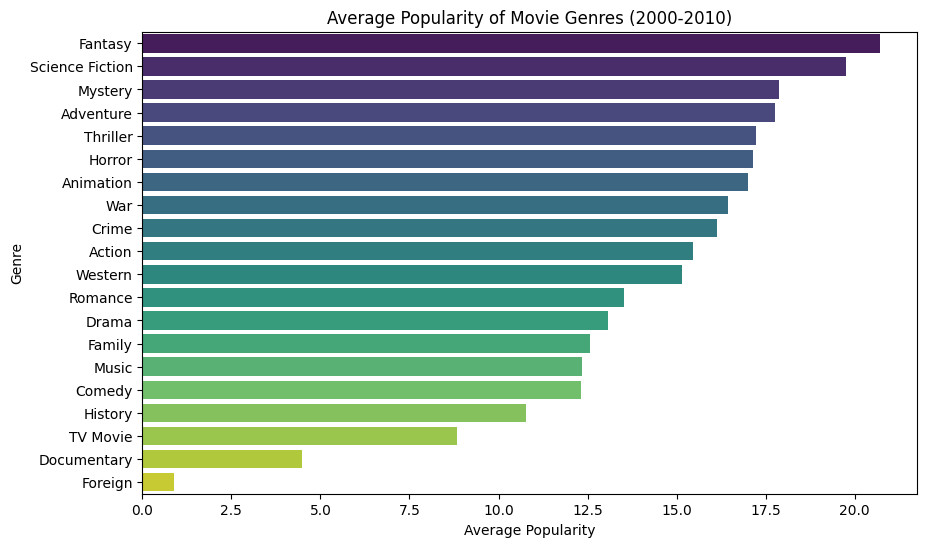

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the genre popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, hue=genre_popularity.index, palette="viridis", dodge=False, legend=False)
plt.title('Average Popularity of Movie Genres (2000-2010)')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

Most common cast over the years

In [16]:
import pandas as pd

# Step 1: Explode the 'cast' column
movies_with_credits['cast'] = movies_with_credits['cast'].apply(eval)  # Convert string representation of lists to actual lists
movies_exploded_cast = movies.explode('cast')

# Step 2: Extract cast member names
movies_exploded_cast['cast_name'] = movies_exploded_cast['cast'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Step 3: Group by cast member names and count their occurrences
common_cast = movies_exploded_cast['cast_name'].value_counts()

# Display the most common cast members
print(common_cast.head(10))  # Display the top 10 most common cast members


Series([], Name: count, dtype: int64)


Which movies were the highest grossing in revenue?

In [17]:
import pandas as pd

# Step 1: Ensure the 'revenue' column is numeric
movies_with_credits['revenue'] = pd.to_numeric(movies_with_credits['revenue'], errors='coerce')

# Step 2: Sort the DataFrame by the 'revenue' column in descending order
highest_grossing_movies = movies.sort_values(by='revenue', ascending=False)

# Step 3: Display the top 10 highest-grossing movies
top_10_highest_grossing = highest_grossing_movies[['title', 'revenue']].head(10)

# Print the result
print(top_10_highest_grossing)


                          title     revenue
0                        Avatar  2787965087
25                      Titanic  1845034188
16                 The Avengers  1519557910
28               Jurassic World  1513528810
44                    Furious 7  1506249360
7       Avengers: Age of Ultron  1405403694
124                      Frozen  1274219009
31                   Iron Man 3  1215439994
546                     Minions  1156730962
26   Captain America: Civil War  1153304495


Which movies had the highest return on investment (ROI)?

In [18]:
import pandas as pd

# Step 1: Ensure 'budget' and 'revenue' are numeric
movies_with_credits['budget'] = pd.to_numeric(movies_with_credits['budget'], errors='coerce')
movies_with_credits['revenue'] = pd.to_numeric(movies_with_credits['revenue'], errors='coerce')

# Step 2: Calculate ROI
movies_with_credits['ROI'] = (movies_with_credits['revenue'] - movies_with_credits['budget']) / movies_with_credits['budget']

# Step 3: Handle cases where budget is 0 to avoid division by zero
movies_with_credits = movies_with_credits[movies_with_credits['budget'] > 0]

# Step 4: Sort the movies by ROI in descending order
highest_roi_movies = movies_with_credits.sort_values(by='ROI', ascending=False)

# Step 5: Display the top 10 movies with the highest ROI
top_10_roi_movies = highest_roi_movies[['title', 'budget', 'revenue', 'ROI']].head(10)

# Print the result
print(top_10_roi_movies)


                             title  budget    revenue            ROI
3137                     Nurse 3-D      10   10000000  999999.000000
4724                    Eraserhead   10000    7000000     699.000000
4788                Pink Flamingos   12000    6000000     499.000000
4742                 Super Size Me   65000   28575078     438.616585
4723                   The Gallows  100000   42664410     425.644100
3159  The Texas Chain Saw Massacre   85000   30859000     362.047059
4668              The Stewardesses  100000   27000000     269.000000
3737      Night of the Living Dead  114000   30000000     262.157895
4670                       Mad Max  400000  100000000     249.000000
2409                     Halloween  300000   70000000     232.333333


Which production companies produce the most movies?

In [19]:
import pandas as pd

# Step 1: Convert the 'production_companies' column to a list of dictionaries if it's a string
movies_with_credits['production_companies'] = movies_with_credits['production_companies'].apply(eval)

# Step 2: Explode the production companies to have one company per row
movies_exploded = movies.explode('production_companies')

# Step 3: Extract the 'name' field of each production company
movies_exploded['company_name'] = movies_exploded['production_companies'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Step 4: Count the occurrences of each production company
company_counts = movies_exploded['company_name'].value_counts()

# Display the top 10 production companies by the number of movies produced
top_10_companies = company_counts.head(10)
print(top_10_companies)


<ipython-input-19-00d49b3cc1d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_credits['production_companies'] = movies_with_credits['production_companies'].apply(eval)


Series([], Name: count, dtype: int64)


# One-Hot Encoding

This is a technique used to convert categorical variables into a numerical format that machine learning models can understand. This way, machine learning models can interpret categorical data without assuming any ordinal relationship between categories.


Explode the lists into separate rows, allowing each element to be treated individually for one-hot encoding.

In [20]:
# Explode the lists into separate rows for one-hot encoding
movies_genres = movies.explode('genres')
movies_genres['genre_name'] = movies_genres['genres'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

movies_companies = movies.explode('production_companies')
movies_companies['company_name'] = movies_companies['production_companies'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

movies_cast = movies.explode('cast')
movies_cast['cast_name'] = movies_cast['cast'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

movies_crew = movies.explode('crew')
movies_crew['crew_name'] = movies_crew['crew'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

In [21]:
# One-hot encode the processed columns
genres_encoded = pd.get_dummies(movies_genres['genre_name'], prefix='genre')
companies_encoded = pd.get_dummies(movies_companies['company_name'], prefix='company')
cast_encoded = pd.get_dummies(movies_cast['cast_name'], prefix='cast')
crew_encoded = pd.get_dummies(movies_crew['crew_name'], prefix='crew')

In [22]:
# Reset the index of the original DataFrame and the encoded DataFrames
movies_with_credits = movies.reset_index(drop=True)
genres_encoded = genres_encoded.reset_index(drop=True)
companies_encoded = companies_encoded.reset_index(drop=True)
cast_encoded = cast_encoded.reset_index(drop=True)
crew_encoded = crew_encoded.reset_index(drop=True)


In [23]:
# Concatenate genres_encoded first
movies_with_credits = pd.concat([movies_with_credits, genres_encoded], axis=1)
movies_with_credits = movies_with_credits.drop(['genres'], axis=1, errors='ignore')

# Then concatenate companies_encoded
movies_with_credits = pd.concat([movies, companies_encoded], axis=1)
movies_with_credits = movies_with_credits.drop(['production_companies'], axis=1, errors='ignore')

# Continue with cast_encoded and crew_encoded
movies_with_credits = pd.concat([movies, cast_encoded], axis=1)
movies_with_credits = movies_with_credits.drop(['cast'], axis=1, errors='ignore')

movies_with_credits = pd.concat([movies_with_credits, crew_encoded], axis=1)
movies_with_credits = movies_with_credits.drop(['crew'], axis=1, errors='ignore')

# Feature Scaling

Scaling numeric features is necessary to ensure they are on the same scale.

In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Identify numeric features
numeric_features = ['budget', 'revenue', 'popularity','vote_average']

# Check for infinite values and replace them with NaN
movies_with_credits[numeric_features] = movies_with_credits[numeric_features].replace([np.inf, -np.inf], np.nan)

# Optionally, drop rows with NaN values in numeric features
movies_with_credits = movies_with_credits.dropna(subset=numeric_features)

# Scale the numeric features
scaler = StandardScaler()
movies_with_credits.loc[:, numeric_features] = scaler.fit_transform(movies_with_credits[numeric_features])

# Check the result
print("Scaling complete. Here's a preview:")
print(movies[numeric_features].head())

Scaling complete. Here's a preview:
      budget     revenue  popularity  vote_average
0  237000000  2787965087  150.437577           7.2
1  300000000   961000000  139.082615           6.9
2  245000000   880674609  107.376788           6.3
3  250000000  1084939099  112.312950           7.6
4  260000000   284139100   43.926995           6.1


# MODELLING

# COSINE SIMILARITY
Cosine similarity is a metric used to measure how similar two vectors are, regardless of their magnitude. It calculates the cosine of the angle between two vectors, and the value ranges from -1 to 1:

1 means vectors are identical and point in the same direction.
0 means vectors have no similarity.
-1 means vectors are diametrically opposed meaning that they are completely dissimilar.

In this movie recommender system project, each movie can be represented as a vector in a high-dimensional space, where each dimension could correspond to a feature like genre, cast, production companies, or other numerical values like budget, popularity, etc.

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Select the final features for similarity calculation (already concatenated and encoded)
features_for_similarity = movies_with_credits[['budget', 'popularity', 'revenue', 'vote_average']]

# Compute the cosine similarity matrix based on these features
cosine_sim_matrix = cosine_similarity(features_for_similarity)

# Create a DataFrame to map the movie indices with the similarity scores
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=movies_with_credits['title'], columns=movies_with_credits['title'])

# Preview the similarity scores for a specific movie (example for 'Inception')
movie_title = 'Inception'
similar_movies = cosine_sim_df[movie_title].sort_values(ascending=False).head(10)

print(f"Movies similar to {movie_title}:\n", similar_movies)



Movies similar to Inception:
 title
Inception                     1.000000
The Dark Knight               0.998905
Monsters, Inc.                0.998358
Iron Man                      0.995548
Terminator 2: Judgment Day    0.995290
Ant-Man                       0.992427
Cinderella                    0.991274
Die Hard 2                    0.989719
The Revenant                  0.988285
Men in Black                  0.988261
Name: Inception, dtype: float64


# RECOMMENDATION

In [ ]:
# Create a function to get movie recommendations based on the cosine similarity matrix
def get_recommendations(title, cosine_sim_matrix, movies_with_credits):
    # Get the index of the movie that matches the title
    idx = movies_with_credits.index[movies_with_credits['title'] == title][0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies (excluding the first one, which is the same movie)
    movie_indices = [i[0] for i in sim_scores[1:11]]  # Top 10 similar movies

    # Return the top 10 most similar movies
    return movies_with_credits['title'].iloc[movie_indices]

# Test the recommendation system
print(get_recommendations('Ice Age', cosine_sim_matrix, movies_with_credits))


270                        The Martian
1013                          Child 44
614                      Despicable Me
1122                  Along Came Polly
961                          The Beach
335     Rise of the Planet of the Apes
1557               Million Dollar Baby
634                         The Matrix
1372                         Guess Who
1390    Underworld: Rise of the Lycans
Name: title, dtype: object
